In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class BinaryBandit:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2
    
    def pull(self, arm):
        if arm == 1:
            return np.random.binomial(1, self.p1)
        else:
            return np.random.binomial(1, self.p2)

In [3]:
def epsilon_greedy(bandit, num_trials, epsilon):

    rewards = np.zeros(num_trials)
    actions = np.zeros(num_trials)
    
    q_values = np.zeros(2) 
    n_values = np.zeros(2)  
    
    cumulative_rewards = np.zeros(num_trials)
    average_rewards = np.zeros(num_trials)
    
    for t in range(num_trials):
        if np.random.random() < epsilon:
            action = np.random.randint(1, 3) 
        else:
            action = np.argmax(q_values) + 1 
        
       
        reward = bandit.pull(action)
        
        action_idx = action - 1
        n_values[action_idx] += 1
        q_values[action_idx] += (reward - q_values[action_idx]) / n_values[action_idx]
        
        rewards[t] = reward
        actions[t] = action
        
        cumulative_rewards[t] = np.sum(rewards[:t+1])
        average_rewards[t] = cumulative_rewards[t] / (t + 1)
    
    return rewards, actions, cumulative_rewards, average_rewards

In [4]:
def plot_results(average_rewards, cumulative_rewards, num_trials):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    
    ax1.plot(range(num_trials), average_rewards)
    ax1.set_xlabel('Trials')
    ax1.set_ylabel('Average Reward')
    ax1.set_title('Average Reward over Time')
    ax1.grid(True)
    
    ax2.plot(range(num_trials), cumulative_rewards)
    ax2.set_xlabel('Trials')
    ax2.set_ylabel('Cumulative Reward')
    ax2.set_title('Cumulative Reward over Time')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

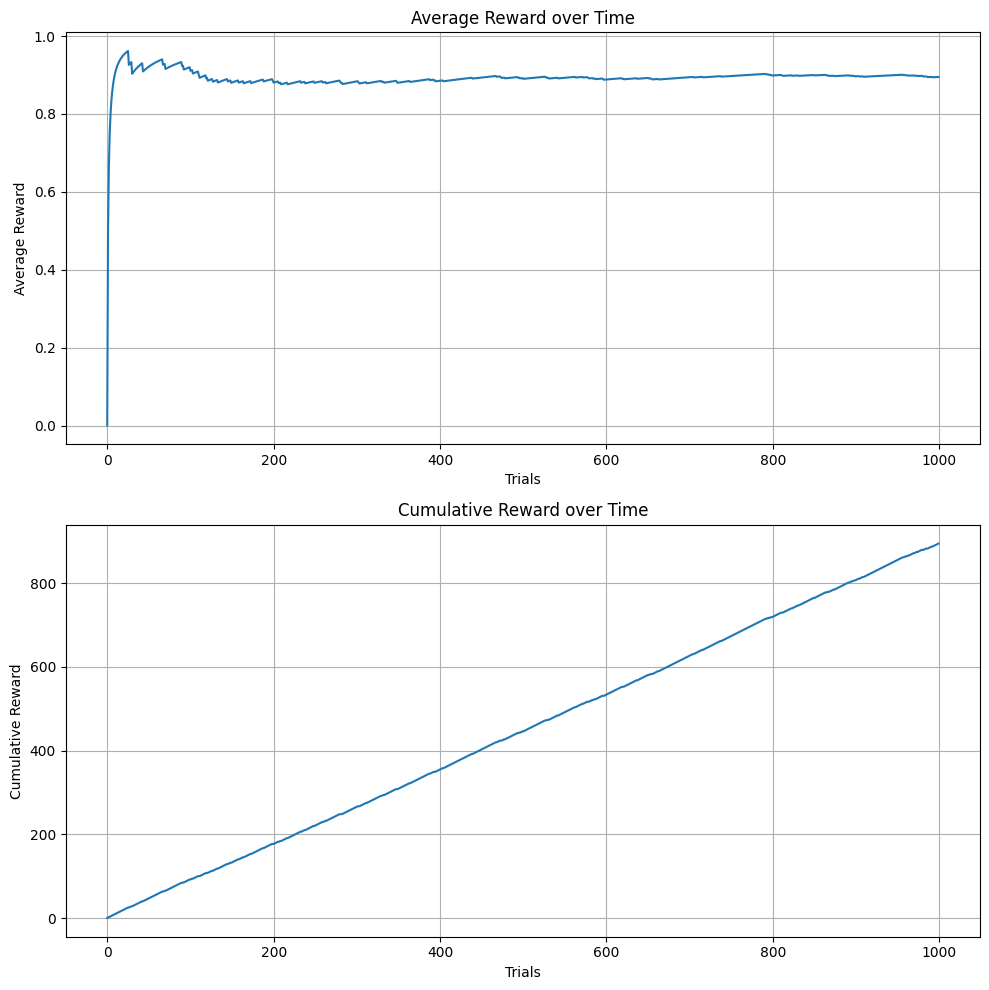

In [5]:
# Run simulation
if __name__ == "__main__":
    np.random.seed(42)
    
    p1_A = 0.1  # Probability of success for arm 1
    p2_A = 0.2  # Probability of success for arm 2
    
    p1_B = 0.8  # Probability of success for arm 1
    p2_B = 0.9  # Probability of success for arm 2
    
    bandit_choice = "B" 

    if bandit_choice == "A":
        bandit = BinaryBandit(p1_A, p2_A)
    else:
        bandit = BinaryBandit(p1_B, p2_B)
    
    num_trials = 1000
    epsilon = 0.1
    
    rewards, actions, cumulative_rewards, average_rewards = epsilon_greedy(bandit, num_trials, epsilon)
    
    plot_results(average_rewards, cumulative_rewards, num_trials)